In [20]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from math import pi, sqrt
from typing import List, NamedTuple


class SongFeedbackProbabilities(NamedTuple):
    listen: float
    skip: float
    like: float
    dislike: float
    loved: float
    hated: float

    categories = ["listen", "skip", "like", "dislike", "loved", "hated"]

    conversion = {
        "listen": 1,
        "skip": -1,
        "like": 2,
        "dislike": -2,
        "loved": 3,
        "hated": -3,
    }

    def __getitem__(self, key):
        return self.conversion[key]

listen


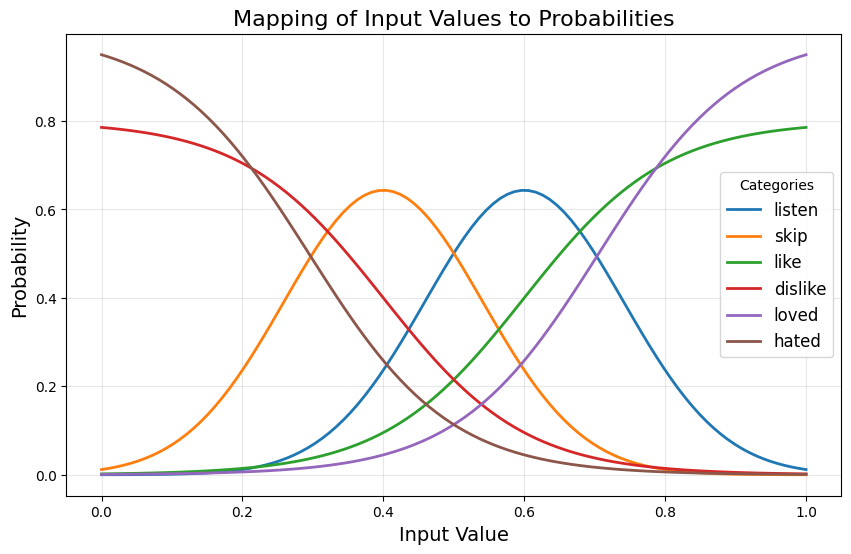

In [28]:
def calculate_probabilities(n: float, linear=False) -> SongFeedbackProbabilities:
    """
    listen (+1), skip (-1), like (+2), dislike (-2), loved (+3), hated (-3)
    """

    if linear:
        listen_prob = 0.5  # listen: more likely as n -> 1
        skip_prob = 0.0  # skip: more likely as n -> 0
        like_prob = 0.6 * n  # like: more likely as n -> 1
        dislike_prob = 0.6 * (1 - n)  # dislike: more likely as n -> 0
        love_prob = 0.9 * n  # loved: more likely as n -> 1
        hate_prob = 0.9 * (1 - n)  # hated: more likely as n -> 0
    else:
        mu, sigma = 0.4, 0.4

        listen_prob = (
            1
            / sqrt(2 * pi * sigma**2)
            * exp(-4 * (n - mu - 0.2) ** 2 / sigma**2)
            * 20
            / 31
        )
        skip_prob = (
            1 / sqrt(2 * pi * sigma**2) * exp(-4 * (n - mu) ** 2 / sigma**2) * 20 / 31
        )
        like_prob = (1 / (1 + exp(-10 * (n - 0.6)))) * 0.8
        dislike_prob = (1 - 1 / (1 + exp(-10 * (n - (1 - 0.6))))) * 0.8
        love_prob = 1 / (1 + exp(-(1.4444 + 10 * (n - 0.85))))
        hate_prob = 1 - 1 / (1 + exp(0.44439 - 10 * (n - 0.25)))

    return SongFeedbackProbabilities(
        listen_prob, skip_prob, like_prob, dislike_prob, love_prob, hate_prob
    )


def probabilistic_model_numpy(input_value: float):
    if not (0.0 <= input_value <= 1.0):
        raise ValueError("Input value must be in range [0,1].")

    categories = SongFeedbackProbabilities.categories

    probs = calculate_probabilities(input_value)

    probabilities = np.array(
        [probs.listen, probs.skip, probs.like, probs.dislike, probs.loved, probs.hated]
    )
    probabilities /= probabilities.sum()

    output = np.random.choice(categories, p=probabilities)
    return output


input_values = np.linspace(0, 1, 100)  # 100 points between 0 and 1
probabilities = {
    "listen": [],
    "skip": [],
    "like": [],
    "dislike": [],
    "loved": [],
    "hated": [],
}

# Compute probabilities for each input value
for i in input_values:
    prob = calculate_probabilities(i)

    probabilities["listen"].append(prob[0])
    probabilities["skip"].append(prob[1])
    probabilities["like"].append(prob[2])
    probabilities["dislike"].append(prob[3])
    probabilities["loved"].append(prob[4])
    probabilities["hated"].append(prob[5])

# Plot probabilities
plt.figure(figsize=(10, 6))
for category, values in probabilities.items():
    plt.plot(input_values, values, label=category, linewidth=2)

# Add labels, legend, and grid
plt.title("Mapping of Input Values to Probabilities", fontsize=16)
plt.xlabel("Input Value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(title="Categories", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

In [9]:
for input in np.linspace(0, 1, 100):
    # input = np.random.rand()
    output = probabilistic_model_numpy(input)

    print(f"Input: {input:.2f} -> Output: {output}")

Input: 0.00 -> Output: hated
Input: 0.01 -> Output: hated
Input: 0.02 -> Output: hated
Input: 0.03 -> Output: dislike
Input: 0.04 -> Output: dislike
Input: 0.05 -> Output: hated
Input: 0.06 -> Output: hated
Input: 0.07 -> Output: dislike
Input: 0.08 -> Output: hated
Input: 0.09 -> Output: dislike
Input: 0.10 -> Output: dislike
Input: 0.11 -> Output: dislike
Input: 0.12 -> Output: hated
Input: 0.13 -> Output: dislike
Input: 0.14 -> Output: hated
Input: 0.15 -> Output: dislike
Input: 0.16 -> Output: hated
Input: 0.17 -> Output: dislike
Input: 0.18 -> Output: skip
Input: 0.19 -> Output: skip
Input: 0.20 -> Output: dislike
Input: 0.21 -> Output: hated
Input: 0.22 -> Output: hated
Input: 0.23 -> Output: skip
Input: 0.24 -> Output: dislike
Input: 0.25 -> Output: dislike
Input: 0.26 -> Output: dislike
Input: 0.27 -> Output: hated
Input: 0.28 -> Output: dislike
Input: 0.29 -> Output: dislike
Input: 0.30 -> Output: dislike
Input: 0.31 -> Output: dislike
Input: 0.32 -> Output: hated
Input: 0.33 

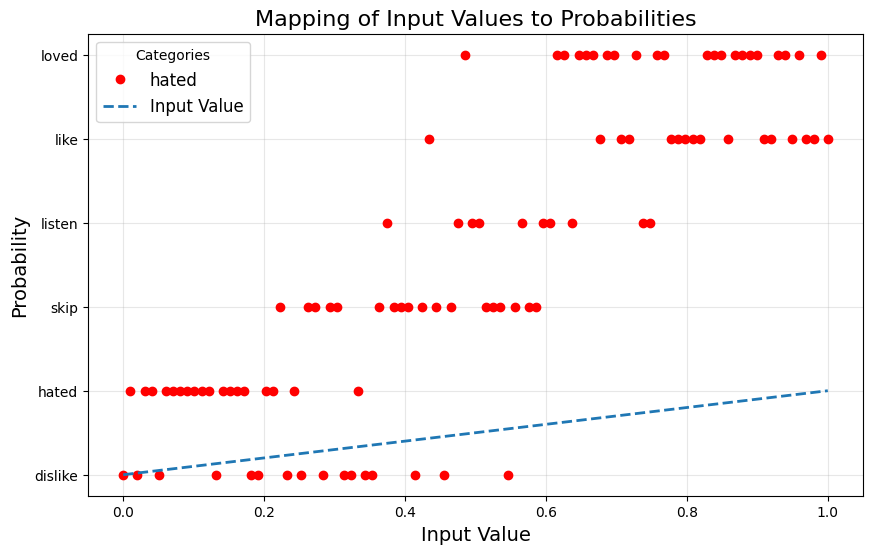

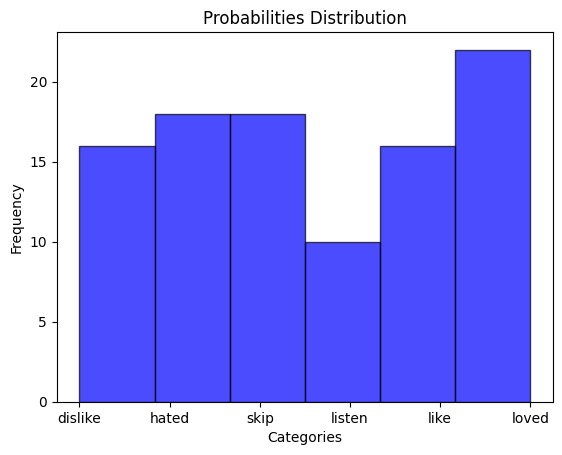

In [19]:
input_values = np.linspace(0, 1, 100)  # 100 points between 0 and 1
probs = []

# Compute probabilities for each input value
for i in input_values:
    prob = probabilistic_model_numpy(i)

    probs.append(prob)

# Plot probabilities
plt.figure(figsize=(10, 6))
plt.plot(input_values, probs, "ro", label=category, linewidth=2)
plt.plot(input_values, input_values, label="Input Value", linewidth=2, linestyle="--")

# Add labels, legend, and grid
plt.title("Mapping of Input Values to Probabilities", fontsize=16)
plt.xlabel("Input Value", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(title="Categories", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# plot probs distribution
plt.hist(probs, bins=6, color="blue", edgecolor="black", alpha=0.7)
plt.title("Probabilities Distribution")
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.show()